# Final Project
**AI Tools 2611**  
**Evan Roegner, Alex Ewart**

This notebook is designed to be run on ROSIE

In [ ]:
import tensorflow as tf

import os
import pathlib
import time
import datetime
import cv2
import numpy as np
import os
import tarfile
import numpy as np
from keras.preprocessing import image
import cv2 as cv
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import GridSearchCV, train_test_split
from skimage.io import imread
import pandas as pd
import warnings

from matplotlib import pyplot as plt
from IPython import display
#!pip install memory_profiler #gpt


for reference, delete later:  
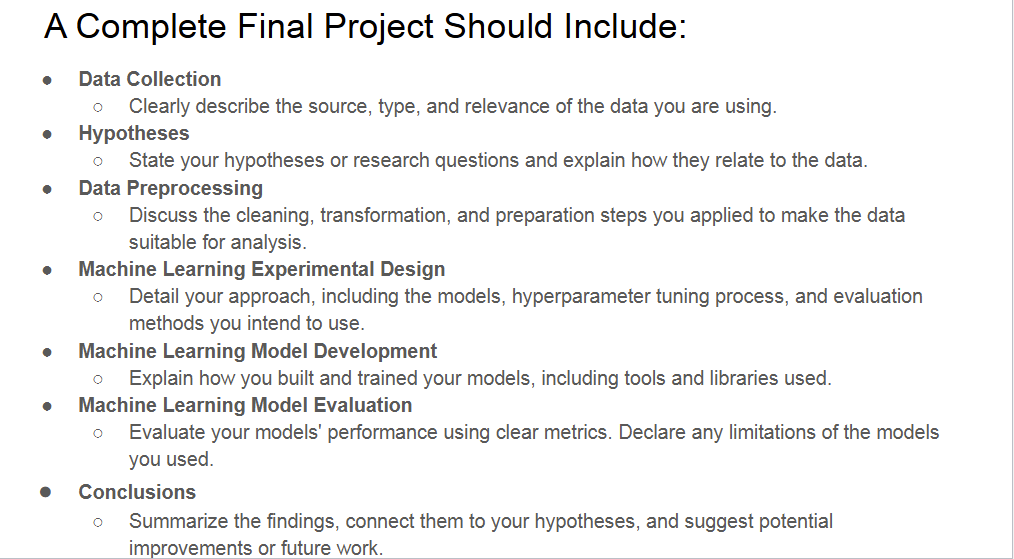

---
### Data Collection
Our images come from two sources.
1) A dataset of hamster images found here: https://images.cv/dataset/hamster-image-classification-dataset
2) A dataset of general images found here: https://www.kaggle.com/datasets/dimensi0n/imagenet-256 

Additionally, we used code for a conditional generative adversarial network (cGAN) from TensorFlow: https://www.tensorflow.org/tutorials/generative/pix2pix   

---

### Research Questions/Hypothesis
**Can a KNN classifier accuratly identify if an image contains a hamster?**  
Through cross-validation and hyperparameter tuning, we will be able to achieve 80% recall in identifying hamsters. Trained differently, we will be able to achieve 80% presicion.  
**Can a cGAN given a dataset of hamsters be used to generate a new hamster?**  
Through hyperparameter tuning the cGAN will be able to generate images that are identifiable as hamsters.  

---

### Data Preprocessing
All of our images have been downloaded as 256 x 256. There are a few images in the hamster dataset that are other animals like ferrets, but this is only a few in about two thousand, and are insignificant. To make sure the general dataset had no images of hamsters, we deleted them from the Kaggle dataset. The downloaded general images had many categories, and we wanted a large variety of images, so of the 8 gigabytes of images in the dataset, we used a script to select an equal amount from every category.  
  
The hamster images were downloaded with variations of the photos including blurriness and random pixle swaps. Before training the cGAN, Alex manually traced the edges of the hamster dataset to get a set of pngs, to make sure the output generations only had hamsters in them.  

---


In [ ]:
#load data here
hamster_folder = "hamster"
not_hamster_folder = "not_hamster"
hamster_folder_png = "hamster_png"

def unzip(folder_name):
    import zipfile as zf
    with zf.ZipFile(f"{folder_name}.zip", 'r') as files:
        files.extractall()

unzip(hamster_folder)
unzip(not_hamster_folder)
unzip(hamster_folder_png)


# Part 1: KNN
---
### Experimental Design
TODO

### Model Development
TODO

In [ ]:
# build model here (functions, call for both recall and presicion models)

In [ ]:
#TODO: COMPLETELY UNEDITED KNN CODE I FOUND ONLINE:

In [ ]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 30*30 + 1)

In [ ]:
def load_image_files(container_path, dimension=(64, 64)):
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]

    descr = "A image classification dataset"
    images = []
    flat_data = []
    target = []
    count = 0
    train_img = []
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            count += 1
            img = imread(file)
            img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
            img_pred = cv.resize(img, (50, 50), interpolation=cv.INTER_AREA)
            img_pred = image.img_to_array(img_pred)
            img_pred = img_pred / 255
            train_img.append(img_pred)

    X = np.array(train_img)

    return X

X = []
X = load_image_files("data/train")

y0 = np.zeros(2000)
#2000 is the number of Cats in X
y1 = np.ones(2134)
#2134 is the number of Dogs in X
y = []
y = np.concatenate((y0,y1), axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, random_state=42, test_size=0.5)
print("X_train: "+str(X_train.shape))
print("X_test: "+str(X_test.shape))
print("X_val: "+str(X_val.shape))
print("y_train: "+str(y_train.shape))
print("y_test: "+str(y_test.shape))
print("y_val: "+str(y_val.shape))

from builtins import range
from builtins import object

num_training = X_train.shape[0]
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = X_test.shape[0]
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

num_val = X_val.shape[0]
mask = list(range(num_val))
X_val = X_val[mask]
y_val = y_val[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))

print("X_train: "+str(X_train.shape))
print("X_test: "+str(X_test.shape))
print("X_val: "+str(X_val.shape))
print("y_train: "+str(y_train.shape))
print("y_test: "+str(y_test.shape))
print("y_val: "+str(y_val.shape))

In [ ]:
class KNearestNeighbor(object):
    """ a kNN classifier with L2 distance """

    def __init__(self):
        pass

    def predict_label(self, dists, k=1):
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            closest_y = []
            closest_y = self.y_train[np.argsort(dists[i])][0:k]
            y_pred[i] = np.bincount(closest_y).argmax()
        return y_pred

    def train(self, X, y):
        """
        Train the classifier. For k-nearest neighbors this is just
        memorizing the training data.

        Inputs:
        - X: A numpy array of shape (num_train, D) containing the training data
          consisting of num_train samples each of dimension D.
        - y: A numpy array of shape (N,) containing the training labels, where
             y[i] is the label for X[i].
        """
        self.X_train = X
        self.y_train = y

    def predict(self, X, k=1):
        """
        Predict labels for test data using this classifier.

        Inputs:
        - X: A numpy array of shape (num_test, D) containing test data consisting
             of num_test samples each of dimension D.
        - k: The number of nearest neighbors that vote for the predicted labels.
        - num_loops: Determines which implementation to use to compute distances
          between training points and testing points.

        Returns:
        - y: A numpy array of shape (num_test,) containing predicted labels for the
          test data, where y[i] is the predicted label for the test point X[i].
        """
        dists = self.compute_distances_no_loops(X)

        return self.predict_labels(dists, k=k)

    def compute_distances_no_loops(self, X):
        """
        Compute the distance between each test point in X and each training point
        in self.X_train using no explicit loops.

        Input / Output: Same as compute_distances_two_loops
        """
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        #########################################################################
        dists = np.sqrt((X ** 2).sum(axis=1, keepdims=1) + (self.X_train ** 2).sum(axis=1) - 2 * X.dot(self.X_train.T))

        return dists

    def predict_labels(self, dists, k=1):
        """
        Given a matrix of distances between test points and training points,
        predict a label for each test point.

        Inputs:
        - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
          gives the distance betwen the ith test point and the jth training point.

        Returns:
        - y: A numpy array of shape (num_test,) containing predicted labels for the
          test data, where y[i] is the predicted label for the test point X[i].
        """
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            # A list of length k storing the labels of the k nearest neighbors to
            # the ith test point.
            closest_y = []
            closest_y = self.y_train[np.argsort(dists[i])][0:k]
            closest_y = closest_y.astype(int)
            y_pred[i] = np.bincount(closest_y).argmax()
        return y_pred

In [ ]:
print("Val Accuracy for k=1")
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)
dists = classifier.compute_distances_no_loops(X_val)
y_val_pred = classifier.predict_labels(dists, k=1)
num_correct = np.sum(y_val_pred == y_val)
accuracy = float(num_correct) / num_val
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_val, accuracy))

In [ ]:
print("Using SKLEARN")
lix = []
liy = []
index=0
acc=0
from sklearn.neighbors import KNeighborsClassifier
for k in range(1, 100):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    liy.append(neigh.score(X_val, y_val))
    if liy[k-1]>acc:
        acc=liy[k-1]
        index=k-1
    lix.append(k)

plt.plot(lix, liy)
plt.show()
print("max acc at k="+str(index+1)+" acc of "+str(acc))

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=43)
neigh.fit(X_train, y_train)
print("Test Accuracy: "+str(neigh.score(X_test, y_test)))

print("Using our own k-NN")
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)
dists = classifier.compute_distances_no_loops(X_test)
y_test_pred = classifier.predict_labels(dists, k=43)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('With k = 43 Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

In [ ]:
print("Predicting custom image")
img = cv.imread("data/test/Dog/12.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_pred = cv.resize(img, (50, 50), interpolation=cv.INTER_AREA)
img_pred = image.img_to_array(img_pred)
img_pred = img_pred/255
img_pred = np.reshape(img_pred, (1, img_pred.shape[0]*img_pred.shape[1]))

classifier2 = KNearestNeighbor()
classifier2.train(X_train, y_train)
# Test your implementation:
dists2 = classifier2.compute_distances_no_loops(img_pred)
labels = ["Cat", "Dog"]
y_test_pred = classifier2.predict_labels(dists2, k=43)
print(labels[int(y_test_pred)])

### Model Evaluatoin
TODO

In [ ]:
# evaluate models here

# Part 2: cGAN
---
### Experimental Design
TODO

### Model Development
TODO

### Model Evaluation
TODO

# Unzip, add borders to image, put in tar file

In [ ]:
# Function to create white images with black borders based on edge detection
def create_duplicate_images(hamster_folder_path, threshold=50):
    # Create a new hamster_folder for the duplicates
    duplicate_hamster_folder = os.path.join(hamster_folder, "sketch")
    os.makedirs(duplicate_hamster_folder, exist_ok=True)
    
    # Initialize a counter for naming the new images sequentially
    img_counter = 1
    
    # Loop through each image in the hamster_folder
    for filename in os.listdir(hamster_folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust file extensions as needed
            img = cv2.imread(os.path.join(hamster_folder, filename))
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            
            # Apply Gaussian blur to reduce noise
            blurred = cv2.GaussianBlur(gray, (3, 3), 0)
            
            # Perform edge detection
            edges = cv2.Canny(blurred, threshold, threshold * 3)
            
            # Create a white image with the same size as the original
            white_img = np.ones_like(img) * 255
            
            # Set the edges to black on the white image
            white_img[edges != 0] = 0
            
            # Concatenate the original and duplicate images
            concatenated_img = np.concatenate((img, white_img), axis=1)
            
            # Save the resulting image with sequential naming
            new_filename = str(img_counter) + ".png"
            cv2.imwrite(os.path.join(duplicate_hamster_folder, new_filename), concatenated_img)
            
            # Increment the counter
            img_counter += 1
    
    print("Duplicate images with black borders created successfully!")

# Call the function for both train and test hamster_folders with a desired threshold
create_duplicate_images(hamster_folder, threshold=75)


Duplicate images with black borders created successfully!


In [ ]:
def compress_hamster_folder_to_tar_gz(hamster_folder_path, output_filename):
    """
    Compresses the contents of a hamster_folder into a .tar.gz file.

    Parameters:
        hamster_folder_path (str): Path to the hamster_folder to be compressed.
        output_filename (str): Name of the output .tar.gz file.

    Returns:
        None
    """
    with tarfile.open(output_filename, "w:gz") as tar:
        # Add all files in the hamster_folder to the tar archive
        for file in os.listdir(hamster_folder_path):
            tar.add(os.path.join(hamster_folder_path, file), arcname=os.path.basename(file))
    
    print(f"hamster_folder '{hamster_folder_path}' compressed to '{output_filename}' successfully!")

# Example usage:
hamster_folder_to_compress = f"{hamster_folder}/sketch"
output_tar_gz_file = f"{hamster_folder}.tar.gz"
compress_hamster_folder_to_tar_gz(hamster_folder_to_compress, output_tar_gz_file)

Folder 'animal hamster/sketch' compressed to 'animal hamster.tar.gz' successfully!


# Get hamsters

In [ ]:
_URL = f'file://{os.path.join(os.getcwd(), hamster_folder)}.tar.gz'

path_to_zip = tf.keras.utils.get_file(
    fname=f"{hamster_folder}.tar.gz",
    origin=_URL,
    extract=True)

path_to_zip  = pathlib.Path(path_to_zip)


In [58]:
sample_image = tf.io.read_file(str('animal hamster/sketch/1018.png'))
sample_image = tf.io.decode_jpeg(sample_image)
print(sample_image.shape)

(256, 512, 3)


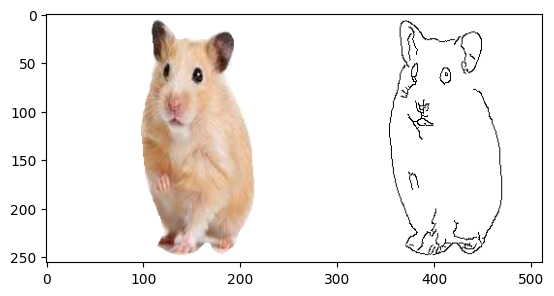

In [59]:
plt.figure()
plt.imshow(sample_image)
plt.show()

In [60]:
def load(image_file):
  # Read and decode an image file to a uint8 tensor
  image = tf.io.read_file(image_file)
  image = tf.io.decode_jpeg(image)

  # Split each image tensor into two tensors:
  # - one with a real building facade image
  # - one with an architecture label image 
  w = tf.shape(image)[1]
  w = w // 2
  input_image = image[:, w:, :]
  real_image = image[:, :w, :]

  # Convert both images to float32 tensors
  input_image = tf.cast(input_image, tf.float32)
  real_image = tf.cast(real_image, tf.float32)

  return input_image, real_image

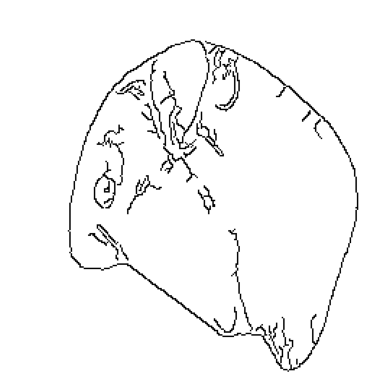

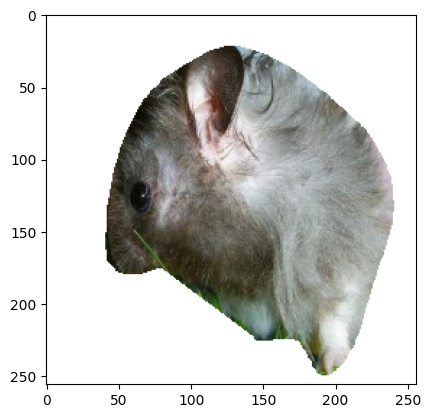

In [61]:
inp, re = load(str('animal hamster/sketch/100.png'))
# Casting to int for matplotlib to display the images
plt.figure()
plt.imshow(inp / 255.0)
plt.axis('off')
plt.show()
plt.figure()
plt.imshow(re / 255.0)
plt.show()

In [62]:
#preprocessing- jittering, random mirroring
BUFFER_SIZE = 400
BATCH_SIZE = 128
# Each image is 256x256 in size
IMG_WIDTH = 256
IMG_HEIGHT = 256

In [63]:
def resize(input_image, real_image, height, width):
  input_image = tf.image.resize(input_image, [height, width],
                                method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  real_image = tf.image.resize(real_image, [height, width],
                               method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

  return input_image, real_image

def random_crop(input_image, real_image):
  stacked_image = tf.stack([input_image, real_image], axis=0)
  cropped_image = tf.image.random_crop(
      stacked_image, size=[2, IMG_HEIGHT, IMG_WIDTH, 3])

  return cropped_image[0], cropped_image[1]
# Normalizing the images to [-1, 1]
def normalize(input_image, real_image):
  input_image = (input_image / 127.5) - 1
  real_image = (real_image / 127.5) - 1

  return input_image, real_image

@tf.function()
def random_jitter(input_image, real_image):
  # Resizing to 286x286
  input_image, real_image = resize(input_image, real_image, 286, 286)

  # Random cropping back to 256x256
  input_image, real_image = random_crop(input_image, real_image)

  if tf.random.uniform(()) > 0.5:
    # Random mirroring
    input_image = tf.image.flip_left_right(input_image)
    real_image = tf.image.flip_left_right(real_image)

  return input_image, real_image

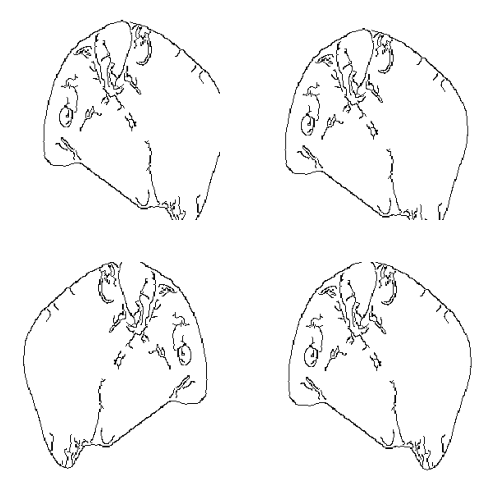

In [64]:
plt.figure(figsize=(6, 6))
for i in range(4):
  rj_inp, rj_re = random_jitter(inp, re)
  plt.subplot(2, 2, i + 1)
  plt.imshow(rj_inp / 255.0)
  plt.axis('off')
plt.show()

In [65]:
print(1)

1


In [66]:
def load_image_train(image_file):
  input_image, real_image = load(image_file)
  input_image, real_image = random_jitter(input_image, real_image)
  input_image, real_image = normalize(input_image, real_image)

  return input_image, real_image
def load_image_test(image_file):
  input_image, real_image = load(image_file)
  input_image, real_image = resize(input_image, real_image,
                                   IMG_HEIGHT, IMG_WIDTH)
  input_image, real_image = normalize(input_image, real_image)

  return input_image, real_image

In [ ]:
all_files = tf.data.Dataset.list_files(f'{hamster_folder}/sketch/*.png')

# Calculate the number of files to take (50% of the dataset)
total_files = len(list(all_files.as_numpy_iterator()))
num_files_to_take = (int) ((total_files * 0.8) // 1)

# Take the first 50% of files
train_files = all_files.take(num_files_to_take)

# Prepare the training dataset
train_dataset = train_files.map(load_image_train, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.batch(BATCH_SIZE)
# Display the length of the dataset
print(f"Length of training dataset: {len(list(train_files.as_numpy_iterator()))}")

# Display the first 5 items (file paths in this case)
first_5_items = list(train_files.as_numpy_iterator())[:20]
print("First 5 items:")
for item in first_5_items:
    print(item.decode('utf-8'))  # Decode byte strings to normal strings



2024-12-07 14:23:09.985442: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Length of training dataset: 1170
First 5 items:
animal hamster/sketch/814.png
animal hamster/sketch/750.png
animal hamster/sketch/927.png
animal hamster/sketch/382.png
animal hamster/sketch/724.png
animal hamster/sketch/708.png
animal hamster/sketch/128.png
animal hamster/sketch/741.png
animal hamster/sketch/1039.png
animal hamster/sketch/967.png
animal hamster/sketch/1015.png
animal hamster/sketch/865.png
animal hamster/sketch/1377.png
animal hamster/sketch/1426.png
animal hamster/sketch/299.png
animal hamster/sketch/366.png
animal hamster/sketch/210.png
animal hamster/sketch/152.png
animal hamster/sketch/897.png
animal hamster/sketch/345.png


2024-12-07 14:23:10.199271: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-12-07 14:23:10.292193: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [68]:
num_files_to_take

1170

In [69]:
len(train_dataset)

10

In [ ]:
# List all files in the hamster_folder
test_dataset = tf.data.Dataset.list_files(f'{hamster_folder}/sketch/*.png')

# Count total files
total_files = test_dataset.cardinality().numpy()  # Get total count as an integer

# Calculate how many files to skip to keep only the last 10%
files_to_skip = int(total_files * 0.8)

# Skip the first 90% of the files
test_dataset = test_dataset.skip(files_to_skip)

# Load, process, and batch the dataset
test_dataset = test_dataset.map(load_image_test)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [71]:
len(test_dataset)

3

In [72]:
OUTPUT_CHANNELS = 3

In [73]:
def downsample(filters, size, apply_batchnorm=True):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(
      tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                             kernel_initializer=initializer, use_bias=False))

  if apply_batchnorm:
    result.add(tf.keras.layers.BatchNormalization())

  result.add(tf.keras.layers.LeakyReLU())

  return result


In [74]:
down_model = downsample(3, 4)
down_result = down_model(tf.expand_dims(inp, 0))
print (down_result.shape)

(1, 128, 128, 3)


In [75]:
def upsample(filters, size, apply_dropout=False):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(
    tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                    padding='same',
                                    kernel_initializer=initializer,
                                    use_bias=False))

  result.add(tf.keras.layers.BatchNormalization())

  if apply_dropout:
      result.add(tf.keras.layers.Dropout(0.5))

  result.add(tf.keras.layers.ReLU())

  return result

In [76]:
up_model = upsample(3, 4)
up_result = up_model(down_result)
print (up_result.shape)

(1, 256, 256, 3)


In [77]:
def Generator():
  inputs = tf.keras.layers.Input(shape=[256, 256, 3])

  down_stack = [
    downsample(64, 4, apply_batchnorm=False),  # (batch_size, 128, 128, 64)
    downsample(128, 4),  # (batch_size, 64, 64, 128)
    downsample(256, 4),  # (batch_size, 32, 32, 256)
    downsample(512, 4),  # (batch_size, 16, 16, 512)
    downsample(512, 4),  # (batch_size, 8, 8, 512)
    downsample(512, 4),  # (batch_size, 4, 4, 512)
    downsample(512, 4),  # (batch_size, 2, 2, 512)
    downsample(512, 4),  # (batch_size, 1, 1, 512)
  ]

  up_stack = [
    upsample(512, 4, apply_dropout=True),  # (batch_size, 2, 2, 1024)
    upsample(512, 4, apply_dropout=True),  # (batch_size, 4, 4, 1024)
    upsample(512, 4, apply_dropout=True),  # (batch_size, 8, 8, 1024)
    upsample(512, 4),  # (batch_size, 16, 16, 1024)
    upsample(256, 4),  # (batch_size, 32, 32, 512)
    upsample(128, 4),  # (batch_size, 64, 64, 256)
    upsample(64, 4),  # (batch_size, 128, 128, 128)
  ]

  initializer = tf.random_normal_initializer(0., 0.02)
  last = tf.keras.layers.Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                         strides=2,
                                         padding='same',
                                         kernel_initializer=initializer,
                                         activation='tanh')  # (batch_size, 256, 256, 3)

  x = inputs

  # Downsampling through the model
  skips = []
  for down in down_stack:
    x = down(x)
    skips.append(x)

  skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
  for up, skip in zip(up_stack, skips):
    x = up(x)
    x = tf.keras.layers.Concatenate()([x, skip])

  x = last(x)

  return tf.keras.Model(inputs=inputs, outputs=x)

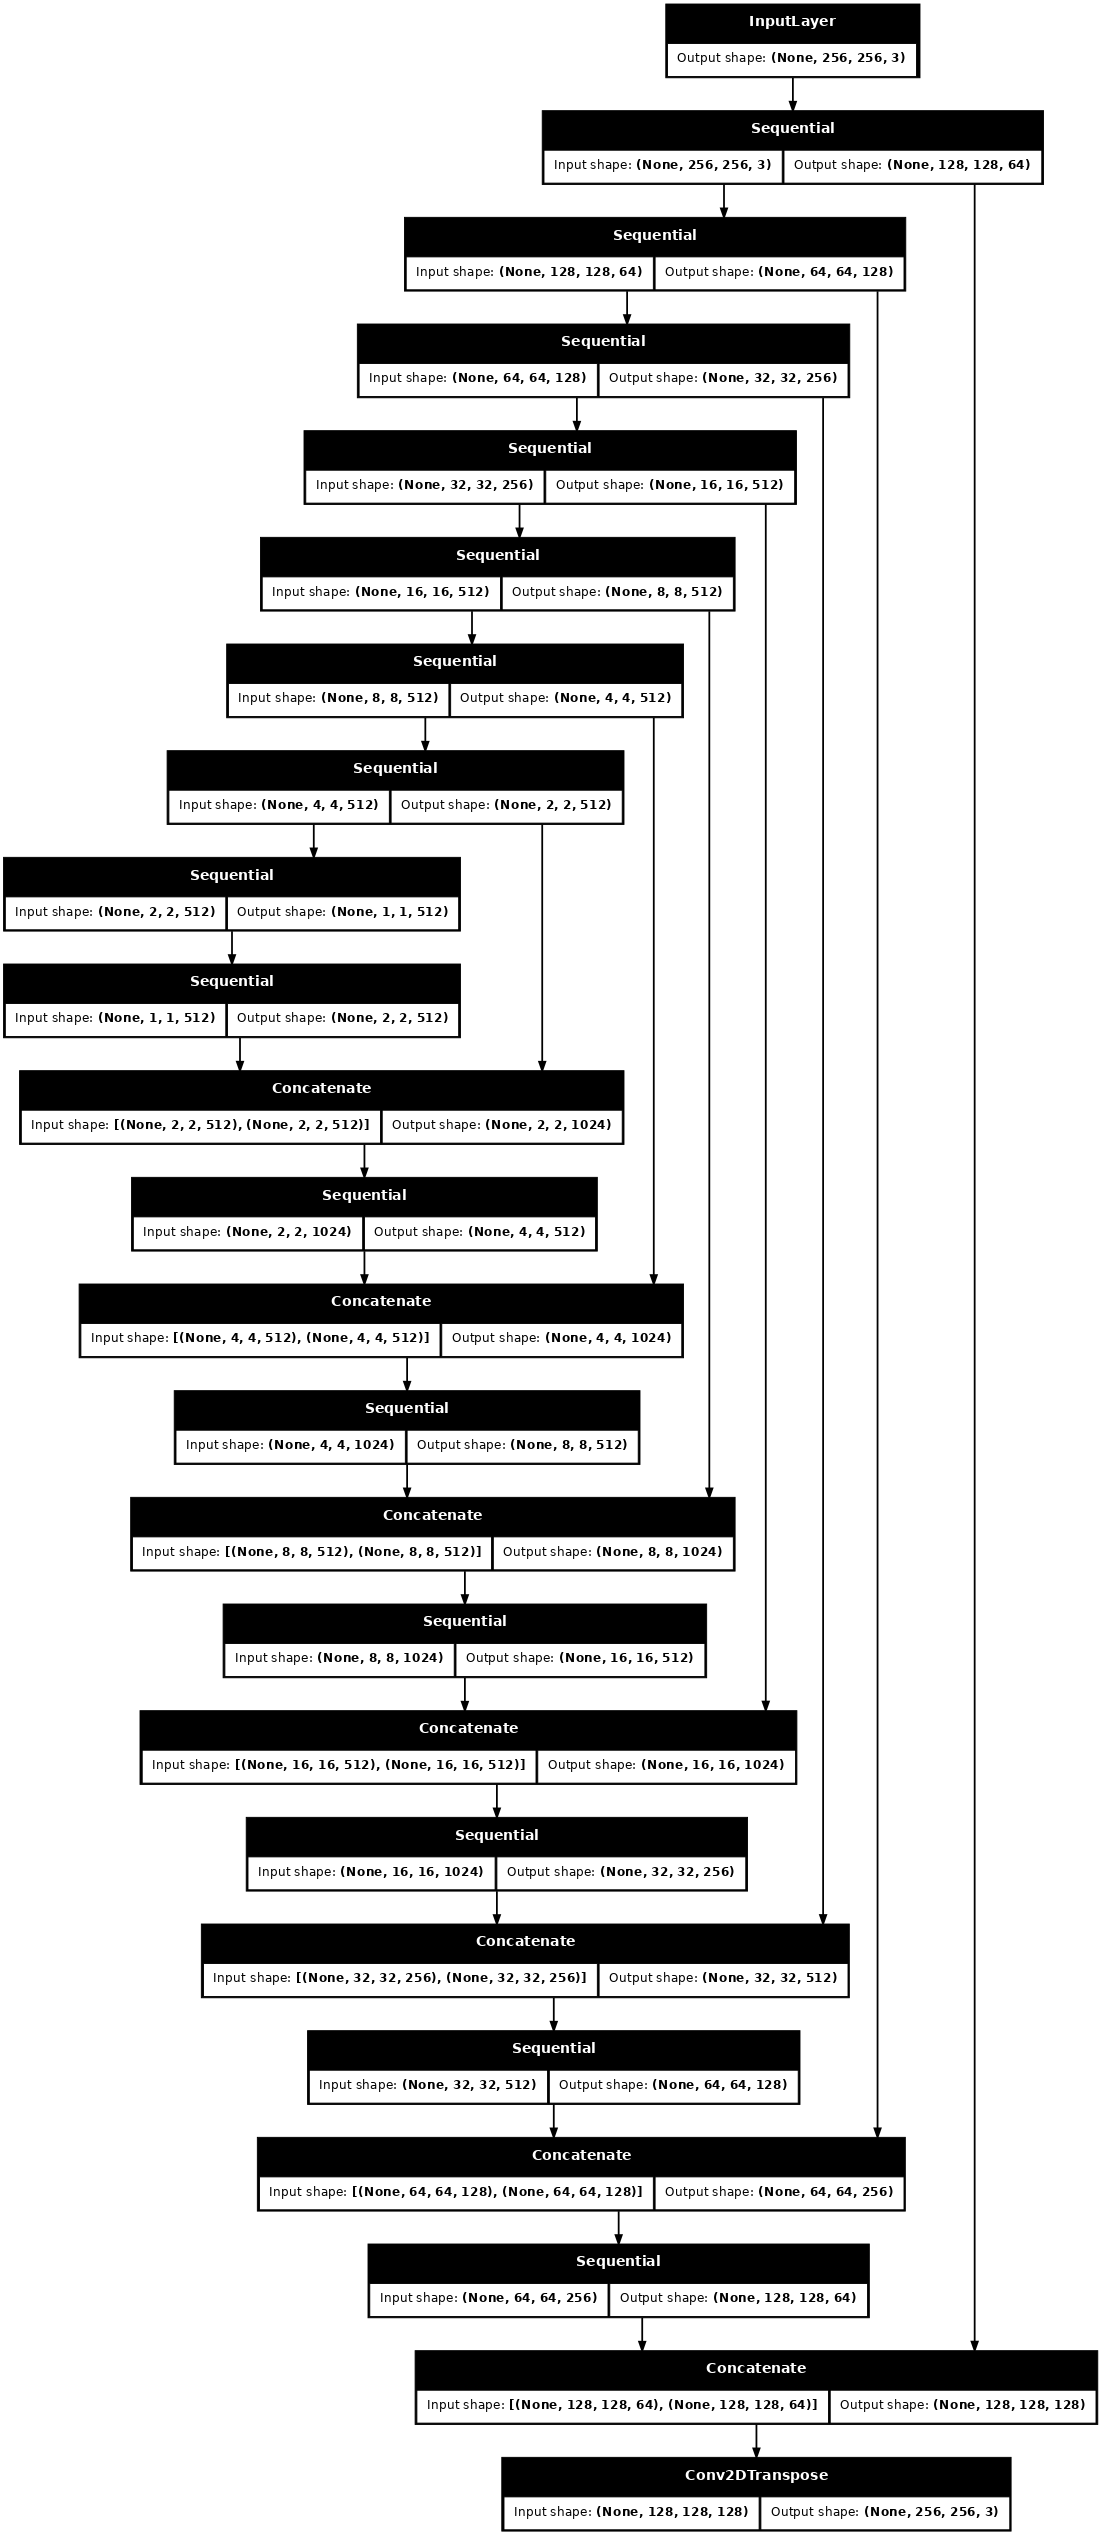

In [78]:
generator = Generator()
tf.keras.utils.plot_model(generator, show_shapes=True, dpi=64)

In [ ]:
gen_output = generator(inp[tf.newaxis, ...], training=False)
plt.imshow(gen_output[0, ...])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


In [80]:
LAMBDA = 100

In [81]:
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [82]:
def generator_loss(disc_generated_output, gen_output, target):
  gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)

  # Mean absolute error
  l1_loss = tf.reduce_mean(tf.abs(target - gen_output))

  total_gen_loss = gan_loss + (LAMBDA * l1_loss)

  return total_gen_loss, gan_loss, l1_loss

In [ ]:
def Discriminator():
  initializer = tf.random_normal_initializer(0., 0.02)

  inp = tf.keras.layers.Input(shape=[256, 256, 3], name='input_image')
  tar = tf.keras.layers.Input(shape=[256, 256, 3], name='target_image')

  x = tf.keras.layers.concatenate([inp, tar])  # (batch_size, 256, 256, channels*2)

  down1 = downsample(64, 4, False)(x)  # (batch_size, 128, 128, 64)
  down2 = downsample(128, 4)(down1)  # (batch_size, 64, 64, 128)
  down3 = downsample(256, 4)(down2)  # (batch_size, 32, 32, 256)

  zero_pad1 = tf.keras.layers.ZeroPadding2D()(down3)  # (batch_size, 34, 34, 256)
  conv = tf.keras.layers.Conv2D(512, 4, strides=1,
                                kernel_initializer=initializer,
                                use_bias=False)(zero_pad1)  # (batch_size, 31, 31, 512)

  batchnorm1 = tf.keras.layers.BatchNormalization()(conv)

  leaky_relu = tf.keras.layers.LeakyReLU()(batchnorm1)

  zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu)  # (batch_size, 33, 33, 512)

  last = tf.keras.layers.Conv2D(1, 4, strides=1,
                                kernel_initializer=initializer)(zero_pad2)  # (batch_size, 30, 30, 1)

  return tf.keras.Model(inputs=[inp, tar], outputs=last)

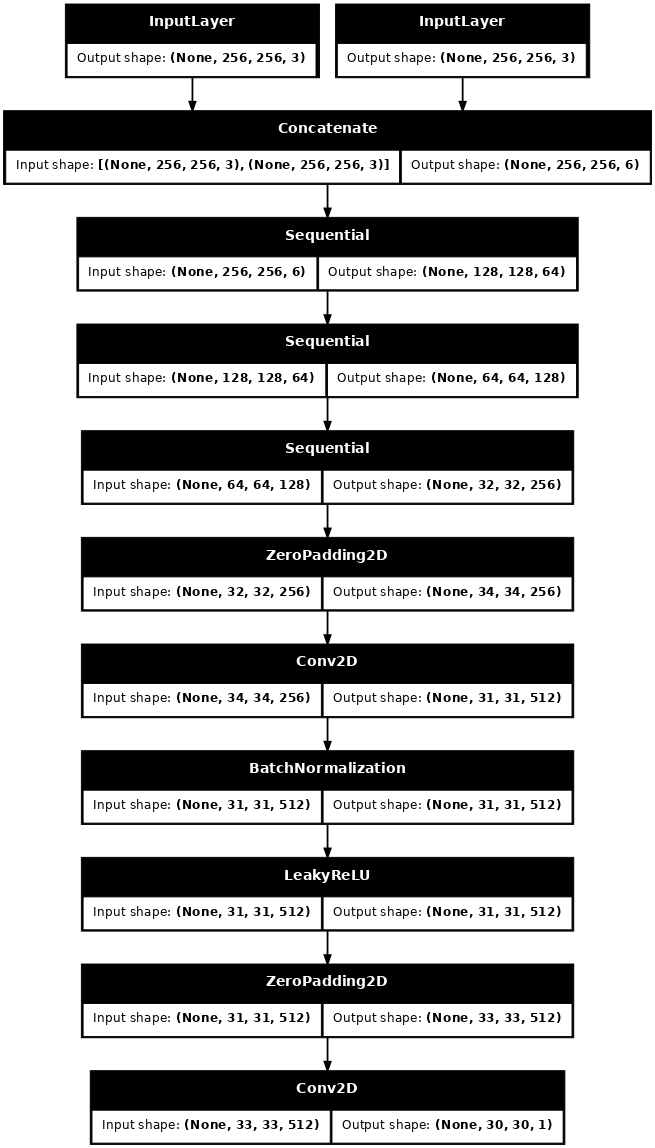

In [83]:
discriminator = Discriminator()
tf.keras.utils.plot_model(discriminator, show_shapes=True, dpi=64)

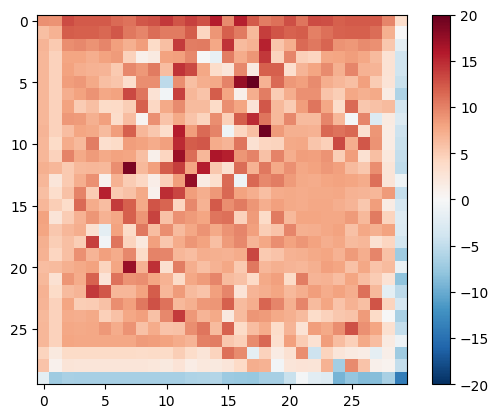

In [84]:
disc_out = discriminator([inp[tf.newaxis, ...], gen_output], training=False)
plt.imshow(disc_out[0, ..., -1], vmin=-20, vmax=20, cmap='RdBu_r')
plt.colorbar()

In [85]:
def discriminator_loss(disc_real_output, disc_generated_output):
  real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)

  generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)

  total_disc_loss = real_loss + generated_loss

  return total_disc_loss

In [86]:
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

In [87]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [88]:
def generate_images(model, test_input, tar):
  prediction = model(test_input, training=True)
  plt.figure(figsize=(15, 15))

  display_list = [test_input[0], tar[0], prediction[0]]
  title = ['Input Image', 'Ground Truth', 'Predicted Image']

  for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(title[i])
    # Getting the pixel values in the [0, 1] range to plot.
    plt.imshow(display_list[i] * 0.5 + 0.5)
    plt.axis('off')
  plt.show()

In [89]:
for example_input, example_target in test_dataset.take(1):
  generate_images(generator, example_input, example_target)

In [90]:
print(1)

1


In [91]:
log_dir="logs/"

summary_writer = tf.summary.create_file_writer(
  log_dir + "fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

In [92]:
@tf.function
def train_step(input_image, target, step):
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    gen_output = generator(input_image, training=True)

    disc_real_output = discriminator([input_image, target], training=True)
    disc_generated_output = discriminator([input_image, gen_output], training=True)

    gen_total_loss, gen_gan_loss, gen_l1_loss = generator_loss(disc_generated_output, gen_output, target)
    disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

  generator_gradients = gen_tape.gradient(gen_total_loss,
                                          generator.trainable_variables)
  discriminator_gradients = disc_tape.gradient(disc_loss,
                                               discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(generator_gradients,
                                          generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(discriminator_gradients,
                                              discriminator.trainable_variables))

  with summary_writer.as_default():
    tf.summary.scalar('gen_total_loss', gen_total_loss, step=step//1000)
    tf.summary.scalar('gen_gan_loss', gen_gan_loss, step=step//1000)
    tf.summary.scalar('gen_l1_loss', gen_l1_loss, step=step//1000)
    tf.summary.scalar('disc_loss', disc_loss, step=step//1000)

In [93]:
def fit(train_ds, test_ds, steps):
  example_input, example_target = next(iter(test_ds.take(1)))
  start = time.time()

  for step, (input_image, target) in train_ds.repeat().take(steps).enumerate():
    if (step) % 50 == 0:
      display.clear_output(wait=True)

      if step != 0:
        print(f'Time taken for 1000 steps: {time.time()-start:.2f} sec\n')

      start = time.time()

      generate_images(generator, example_input, example_target)
      print(f"Step: {step//50} * 50")

    train_step(input_image, target, step)

    # Training step
    if (step+1) % 10 == 0:
      print('.', end='', flush=True)


    # Save (checkpoint) the model every 5k steps
    if (step + 1) % 5000 == 0:
      checkpoint.save(file_prefix=checkpoint_prefix)

In [94]:
%load_ext tensorboard
%tensorboard --logdir {log_dir}

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 3590303), started 2:49:26 ago. (Use '!kill 3590303' to kill it.)

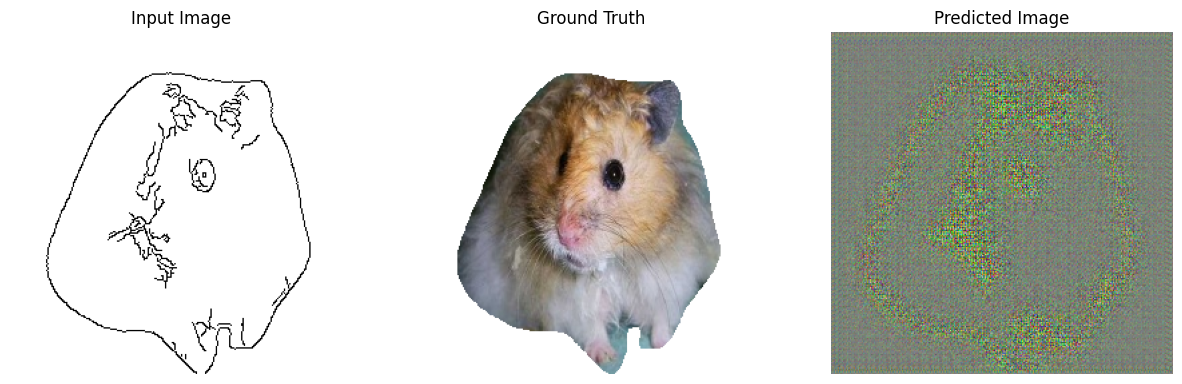

Step: 0 * 50


In [ ]:
fit(train_dataset, test_dataset, steps=1000)

In [45]:
print(1)

1


In [46]:
print(1)

1


In [47]:
print(1)

1


In [48]:
ls {checkpoint_dir}

/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


checkpoint                  ckpt-5.index
ckpt-1.data-00000-of-00001  ckpt-6.data-00000-of-00001
ckpt-1.index                ckpt-6.index
ckpt-2.data-00000-of-00001  ckpt-7.data-00000-of-00001
ckpt-2.index                ckpt-7.index
ckpt-3.data-00000-of-00001  ckpt-8.data-00000-of-00001
ckpt-3.index                ckpt-8.index
ckpt-4.data-00000-of-00001  ckpt-9.data-00000-of-00001
ckpt-4.index                ckpt-9.index
ckpt-5.data-00000-of-00001


In [49]:
# Restoring the latest checkpoint in checkpoint_dir
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [50]:
len(train_dataset)

10

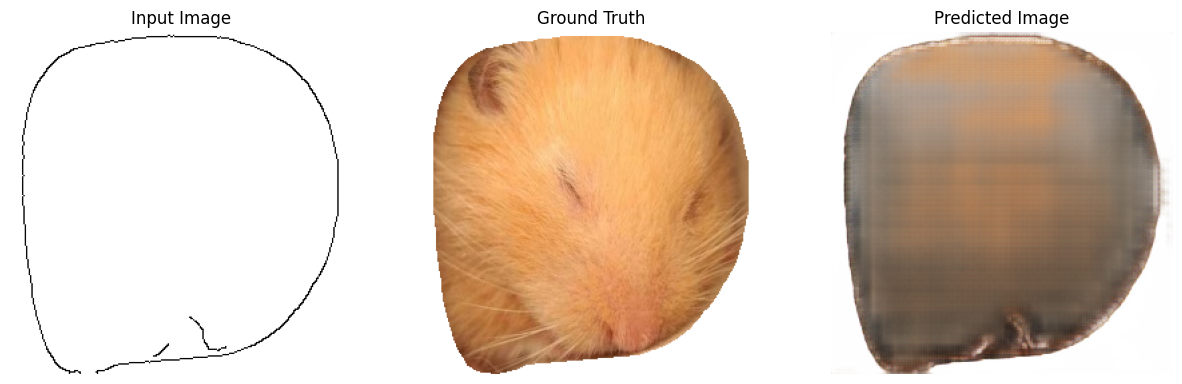

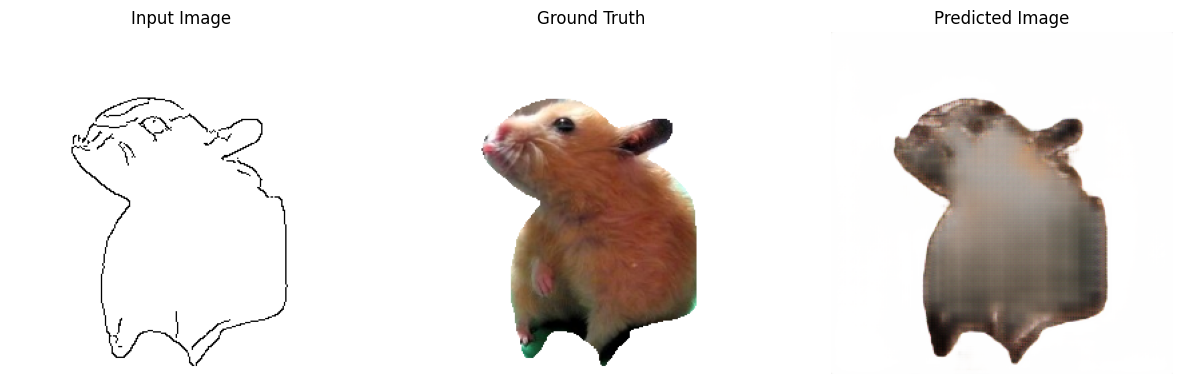

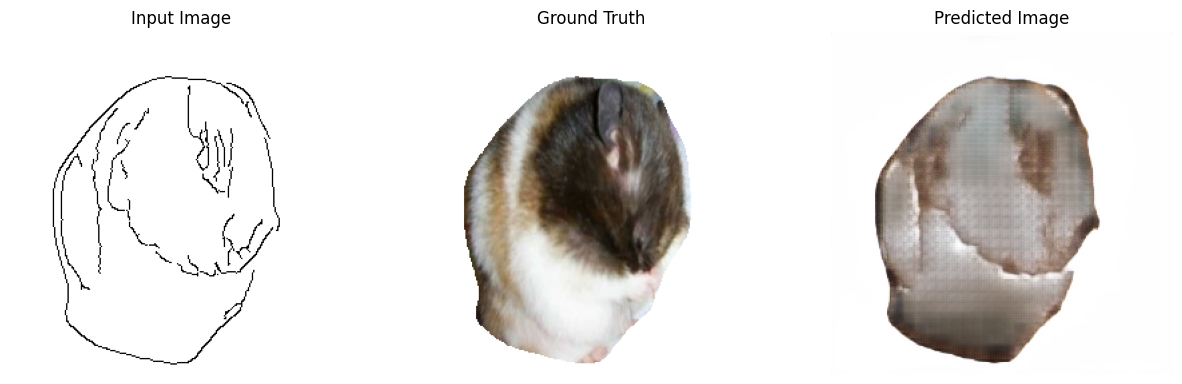

2024-12-07 14:03:03.997868: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [51]:
# Run the trained model on a few examples from the test set
for inp, tar in test_dataset.take(10):
  generate_images(generator, inp, tar)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


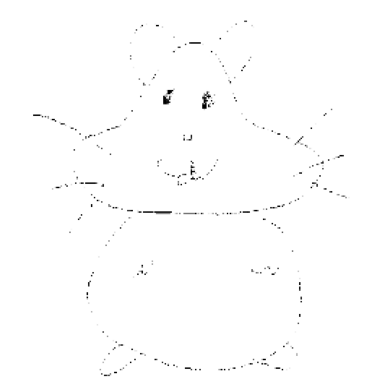

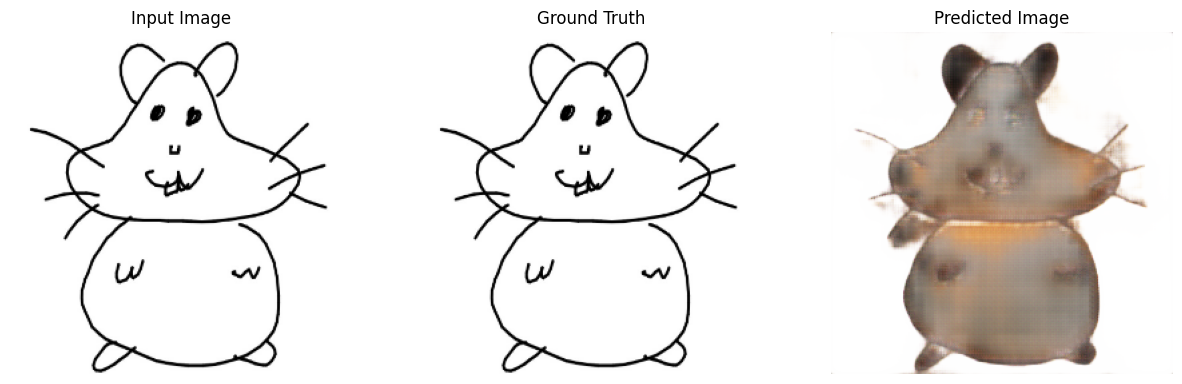

In [52]:
input_image_path = "hams.jpg"  # Assuming "hams.jpg" is in the same directory
input_image = tf.io.read_file(input_image_path)
input_image = tf.image.decode_jpeg(input_image)




input_image = tf.image.resize(input_image, [256, 256])
plt.imshow(input_image)  # Scale from [-1, 1] to [0, 1]
plt.axis('off')
plt.show()

input_image = tf.cast(input_image, tf.float32)  # Convert to float32
input_image = (input_image / 127.5) - 1  # Normalize to [-1, 1]
input_image = tf.expand_dims(input_image, axis=0)  # Add batch dimension
inp = input_image

generate_images(generator, inp, inp)


# # Generate the output image using the generator
# output_image = generator(input_image, training=False)

# # Plot the generated image
# plt.imshow(output_image[0] * 0.5 + 0.5)  # Scale from [-1, 1] to [0, 1]
# plt.axis('off')
# plt.show()





In [50]:
#save in keras format
#generator.save('path_to_save_model.keras')

#save as tf_saved_model
tf.saved_model.save(generator, 'saved_model')


INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


In [ ]:

# Load the saved model
loaded_model = tf.saved_model.load('path_to_save_model')

In [13]:
loaded_model = tf.keras.models.load_model('path_to_saved_model')

ValueError: File format not supported: filepath=path_to_saved_model. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(path_to_saved_model, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).

In [11]:
# Get the concrete function of the model
concrete_func = loaded_model.signatures[tf.saved_model.DEFAULT_SERVING_SIGNATURE_DEF_KEY]

# Get the graph of the model
graph = concrete_func.graph

# Adjust the weights of relevant layers
for op in graph.get_operations():
        print("Adjusting weights for operation:", op.name)
        # Get the original weight tensor
        weight_tensor = op.outputs[0]
        # Get the original weight values
        weight_values = tf.compat.v1.get_default_session().run(weight_tensor)
        # Modify the weight values if necessary
        # Example: Reshape to make sure the size is a multiple of 4 bytes
        weight_values = weight_values.reshape((-1, 4))[:, :weight_values.size // 4 * 4].reshape((-1,))
        # Assign the modified values back to the weight tensor
        tf.compat.v1.assign(weight_tensor, weight_values)


Adjusting weights for operation: input_1


AttributeError: 'NoneType' object has no attribute 'run'

In [13]:
!tensorflowjs_converter --input_format=tf_saved_model --output_format=tfjs_graph_model unconverted_model converted_model


/bin/bash: line 1: tensorflowjs_converter: command not found


/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [13]:
!tensorflowjs_converter --input_format=tf_saved_model --output_format=tfjs_graph_model unconverted_model converted_model


/bin/bash: line 1: tensorflowjs_converter: command not found


/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [48]:
import tensorflowjs as tfjs
import tensorflow as tf

In [49]:
#6 hours
tfjs.converters.convert_tf_saved_model(
    'saved_model',
    'path_to_tfjs_output',
    saved_model_tags="serve",
    quantization_dtype_map={},
    skip_op_check=True,
    strip_debug_ops=False
)

OSError: SavedModel file does not exist at: saved_model

In [50]:
# Save the model
generator.save('my_model.h5')


In [52]:
tfjs.converters.save_keras_model('my_model.keras', 'output_model')

AttributeError: 'str' object has no attribute 'save'